# Ensayo de proceso estadístico de datos
19s_LF1Q

## Importar datos
Se genera un archivo de texto con extensión `.csv`

Importo la biblioteca `pandas` que facilita la importación a un tipo de datos ordenados llamado `Dataframe`.

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('./directas_datos.csv')
datos

Primer columna  Segunda
0              10     20.0
1              25     50.0
2              30     76.4
3              40     89.3

Del `Dataframe` se pueden obtener columnas individuales, que simpre se informan acompañados del número de índice (fila) para facilitar la identificación.

In [3]:
datos['Primer columna']

0    10
1    25
2    30
3    40
Name: Primer columna, dtype: int64

Cada una de estas `Series` podemos procesarlas y graficarlas.

In [4]:
datos['Primer columna']**2

0     100
1     625
2     900
3    1600
Name: Primer columna, dtype: int64

In [5]:
import matplotlib.pyplot as plt

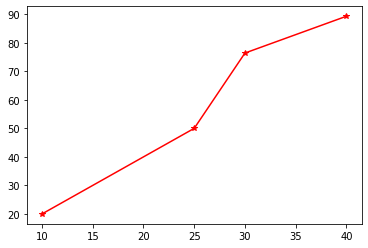

In [6]:
plt.plot(datos['Primer columna'], datos['Segunda'], '*-r')
plt.show()

## Valor medio
Generero una serie con 100 números al azar entre 0 y 1.

In [7]:
import numpy as np

In [8]:
azar= pd.Series(np.random.rand(100))
azar

0     0.403020
1     0.492469
2     0.246332
3     0.008237
4     0.349417
        ...   
95    0.825742
96    0.456340
97    0.059828
98    0.661431
99    0.712101
Length: 100, dtype: float64

(array([15., 10.,  8.,  8., 14., 12., 13.,  6.,  6.,  8.]),
 array([0.0011932 , 0.09980413, 0.19841506, 0.29702598, 0.39563691,
        0.49424784, 0.59285876, 0.69146969, 0.79008062, 0.88869155,
        0.98730247]),
 <a list of 10 Patch objects>)

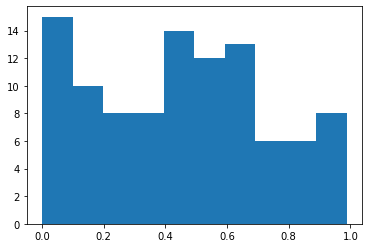

In [9]:
plt.hist(azar)

In [10]:
normales= np.random.normal(loc=4,scale=1,size=100)

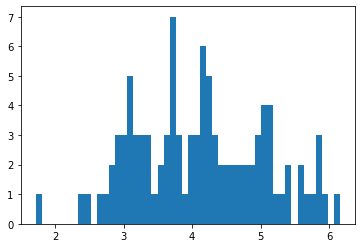

In [11]:
plt.hist(normales,bins=50)
plt.show()

In [12]:
medias = np.zeros(10)
for i in range(10):
    medias[i]= (normales[i*10:i*10+10]).mean()

In [13]:
medias

array([4.58974734, 3.98573314, 3.85515763, 4.40299105, 4.12824219,
       3.932767  , 3.6671806 , 4.50040431, 4.39757208, 3.69668224])

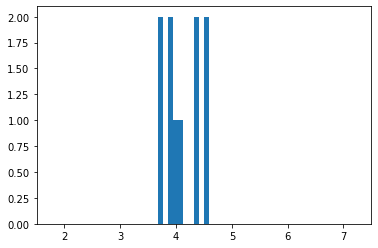

(None,
 (array([2., 0., 2., 1., 1., 0., 0., 2., 0., 2.]),
  array([3.6671806 , 3.75943727, 3.85169395, 3.94395062, 4.0362073 ,
         4.12846397, 4.22072065, 4.31297732, 4.40523399, 4.49749067,
         4.58974734]),
  <a list of 10 Patch objects>))

In [14]:
n= plt.hist(medias)
plt.xlim((1.5,7.5))
plt.show(), n

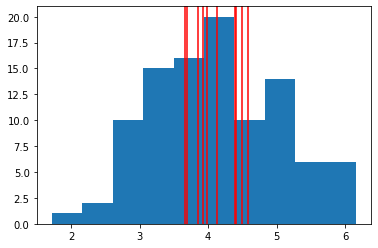

In [15]:
plt.hist(normales)
for i in range(len(medias)):
    plt.axvline(medias[i],color='r')
plt.show()

## Ajuste a un histograma

In [16]:
from scipy.optimize import curve_fit

media =  4.0619613127938035
desviación estandar =  1.0488631684093155


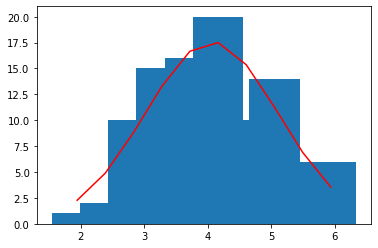

In [17]:
# data = np.random.normal(size=10000)

# hist, bin_edges = np.histogram(data, density=True)
# hist, bin_edges = np.histogram(normales, density=True)
hist, bin_edges = np.histogram(normales, density=False)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.bar(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data', color='r')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('media = ', coeff[1])
print('desviación estandar = ', np.abs(coeff[2]))
plt.savefig('./test.png')
plt.show()

In [18]:
plt.savefig('./test.png')

<Figure size 432x288 with 0 Axes>

In [19]:
normales[1:10]

array([5.79313961, 3.31733369, 4.07008902, 3.00389389, 4.8112496 ,
       5.80822171, 4.51964245, 6.16263602, 5.02088518])

In [20]:
import scipy.stats as stats

In [21]:
stats.mode(normales)

ModeResult(mode=array([1.71814957]), count=array([1]))

In [22]:
normales.sum()

411.564775770121

In [23]:
normales.size

100

In [24]:
normales.std(ddof=1)

0.9365420339856761

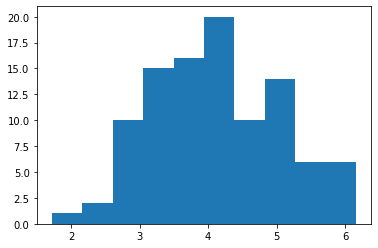

In [25]:
n= plt.hist(normales)

In [26]:
n

(array([ 1.,  2., 10., 15., 16., 20., 10., 14.,  6.,  6.]),
 array([1.71814957, 2.16259821, 2.60704686, 3.0514955 , 3.49594415,
        3.94039279, 4.38484144, 4.82929009, 5.27373873, 5.71818738,
        6.16263602]),
 <a list of 10 Patch objects>)